In [15]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

#import tensorflow_addons as tfa

#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')

#----------DATA CLEANUP 
# drop bad data
clean_data = csv_data.dropna() 

# normalize the data
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())

2.5.0
          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean       0.476882      0.327867  ...       0.233354            0.396497
std        0.199718      0.227135  ...       0.131595            0.239141
min        0.000000      0.000000  ...       0.000000            0.000000
25%        0.254980      0.147715  ...       0.142514            0.215259
50%        0.583665      0.181722  ...       0.209976            0.341032
75%        0.632470      0.550478  ...       0.294279            0.515464
max        1.000000      1.000000  ...       1.000000            1.000000

[8 rows x 9 columns]


In [ ]:
#print(clean_data.describe())

In [16]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
                       count      mean       std  ...       50%       75%       max
longitude           13600.0  0.477008  0.199290  ...  0.583665  0.631474  1.000000
latitude            13600.0  0.327543  0.226913  ...  0.181722  0.549416  1.000000
housing_median_age  13600.0  0.539769  0.247556  ...  0.549020  0.705882  1.000000
total_rooms         13600.0  0.069588  0.057527  ...  0.055991  0.083070  1.000000
total_bedrooms      13600.0  0.083325  0.064867  ...  0.067039  0.100442  0.848852
population          13600.0  0.039908  0.030950  ...  0.032512  0.048404  0.451778
households          13600.0  0.082098  0.062711  ...  0.067094  0.099490  0.853149
median_income       13600.0  0.233508  0.131298  ...  0.210349  0.295203  1.000000

[8 rows x 8 columns]
Test Data
                      count      mean       std  ...       50%       75%       max
longitude           3400.0  0.476375  0.201449  ...  0.583665  0.634462  0.973108
latitude            3400.0  0.329161  0.2

In [17]:
print(len(x_train.keys()))

8


In [37]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_03"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

8
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_03 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
8*32 + 32

288

In [20]:
32*32 + 32

1056

In [21]:
32*1 + 1

33

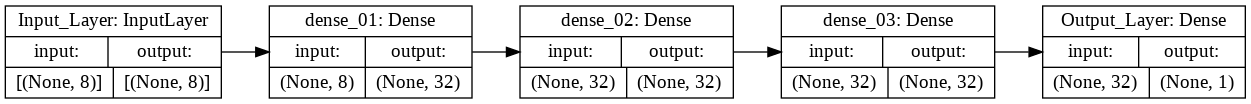

In [38]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [39]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
680/680 [==============================] - 2s 2ms/step - loss: 0.0624 - mae: 0.1880 - val_loss: 0.0339 - val_mae: 0.1432
Epoch 2/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0274 - mae: 0.1254 - val_loss: 0.0231 - val_mae: 0.1133
Epoch 3/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0234 - mae: 0.1128 - val_loss: 0.0216 - val_mae: 0.1059
Epoch 4/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0225 - mae: 0.1097 - val_loss: 0.0210 - val_mae: 0.1019
Epoch 5/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0217 - mae: 0.1075 - val_loss: 0.0202 - val_mae: 0.1021
Epoch 6/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0210 - mae: 0.1053 - val_loss: 0.0198 - val_mae: 0.1026
Epoch 7/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0205 - mae: 0.1037 - val_loss: 0.0192 - val_mae: 0.0985
Epoch 8/20
680/680 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
16*680

In [ ]:
13600*.8

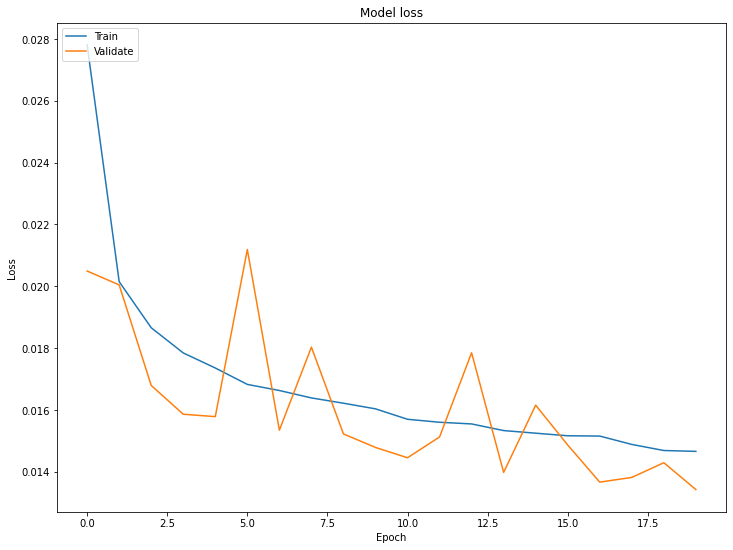

In [35]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [36]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0138 - mae: 0.0821
Loss: 0.01379399560391903 MAE: 0.08213254064321518


In [29]:
#--------PREDICT
p_test = model.predict(x_test)


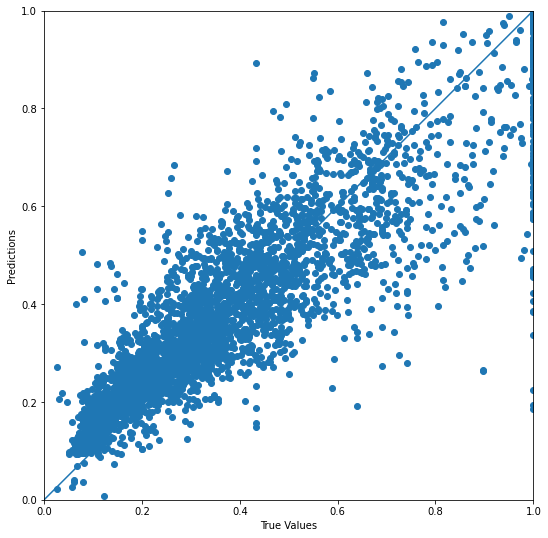

In [30]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

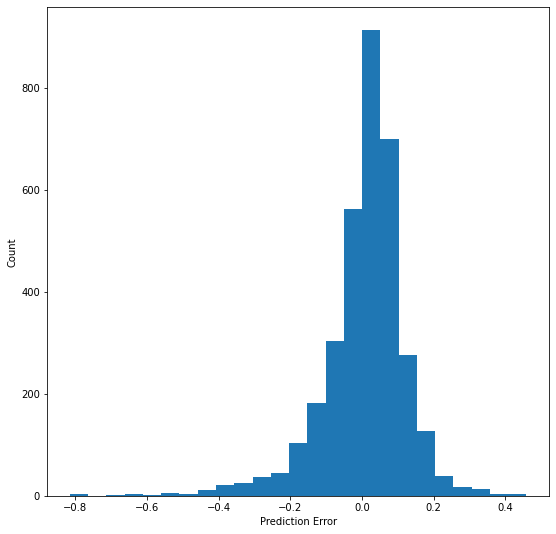

In [31]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()